# Modeling

**Problem Statement:**
What opportunities exist for the CRIC Study to investigate the effects of an individual’s choice of dialysis center on one’s kidney health in the upcoming research year?

CRIC is curious to know how an individual’s choice in dialysis center affects one’s kidney health. 

Attempting to predict a dialysis center's star rating given the center's features. 

This is a classification problem.

## Import Relevant Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, classification_report
import timeit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Load Data

In [2]:
dialysis = pd.read_csv('Data/capstone2_dialysis_scaled_data.csv', index_col=0)

## Explore Data

In [3]:
dialysis.head()

,Network,Five Star,Profit Or Non-Profit,Chain Owned,Late Shift,Number Of Dialysis Stations,Offers In-Center Hemodialysis,Offers Peritoneal Dialysis,Offers Home Hemodialysis Training,Percentage Of Medicare Patients With Hgb < 10 g/dL,...,Chain Organization_UPMC HEALTH SYSTEM,"Chain Organization_US RENAL CARE, INC.",Chain Organization_VETERANS ADMINISTRATION,Chain Organization_WAKE FOREST UNIVERSITY,Mortality Rate Standardized,Readmission Rate Standardized,Hospitalization Rate Standardized,Standard Infection Ratio Standardized,Transfusion Rate Standardized,Fistula Rate Standardized
0,13,2,0,1,0,18,1,1,1,21.0,...,0,0,0,0,2.140881,0.519890,0.866457,1.425778,0.736660,-0.969711
1,18,3,1,1,0,36,1,1,0,18.0,...,0,0,0,0,0.549616,0.506245,0.753945,0.003506,1.386172,0.502423
2,1,5,1,1,0,13,1,1,1,43.0,...,0,0,0,0,-1.234000,-0.953812,-0.592033,1.310012,0.717175,-0.353916
3,4,4,1,1,0,16,1,0,0,20.0,...,0,1,0,0,-1.024163,0.751862,-0.012804,1.161169,-0.250598,-0.555974
4,4,5,1,1,0,11,1,1,1,25.0,...,0,0,0,0,-3.035103,0.110528,-0.748299,-1.236849,-0.523393,-0.565595


In [4]:
dialysis.shape

(7554, 137)

In [5]:
dialysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7554 entries, 0 to 7625
Columns: 137 entries, Network to Fistula Rate Standardized
dtypes: float64(18), int64(119)
memory usage: 8.0 MB


## Test Train Split

In [6]:
# Let independent variables be features that at least moderately correlate with dependent variable (Five Star)
# Found from looking at correlation map in EDA notebook
X_columns =['Percent Of Adult HD Patients With Kt/V >= 1.2',
            'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
            'Mortality Rate Standardized',
            'Readmission Rate Standardized',
            'Hospitalization Rate Standardized',
            'Transfusion Rate Standardized',
            'Fistula Rate Standardized',
            'Percentage Of Adult Patients With Long Term Catheter In Use']
X = dialysis[X_columns]

# Set dependent variable to Five Star column 
y = dialysis['Five Star']

In [7]:
# Train test split data, keeping 25% of data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print train and test shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5665, 8) (5665,)
(1889, 8) (1889,)


## Selecting an evaluation metric

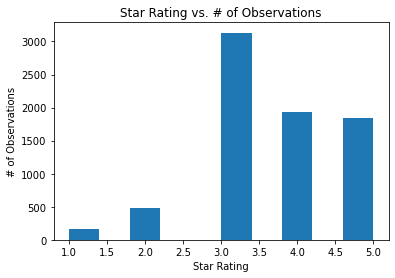

In [8]:
# Plot Five Star to see how dependent variable is distributed
_ = plt.hist(dialysis['Five Star'])
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('# of Observations')
_ = plt.title('Star Rating vs. # of Observations')

Need ordinal, multi-class classifiers.

Class imbalance in Five Star.

Common metrics for evaluating this type of model: F1 Score, Accuracy, and Log-Loss.

Log-loss does not differentiate between classes and only works well for symmetrical classes.

F1-score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

Micro-average is preferable if there is a class imbalance problem.

***F1 with micro-average will be used as the evaluation metric.***

## Modeling

Four types of ordinal, multi-class classifiers:
- Gaussian Naive Bayesian Classifier
- K-Nearest Neighbor Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

### Model 1: Gaussian Naive Bayesian Classifier

In [9]:
# Start time to predict model runtime
start_gaus = timeit.default_timer()

# Fit and predict model
gaus = GaussianNB()
gaus.fit(X_train, y_train)
y_pred_gaus = gaus.predict(X_test)

# Stop time to predict model runtime
stop_gaus = timeit.default_timer()

# Define model runtime variable
Time_gaus = stop_gaus - start_gaus

In [10]:
print('Classification Report: Gaussian Naive Bayesian Classifier Model')
print('')
print(classification_report(y_test, y_pred_gaus))

Classification Report: Gaussian Naive Bayesian Classifier Model

              precision    recall  f1-score   support

           1       0.43      0.35      0.39        37
           2       0.46      0.37      0.41       110
           3       0.73      0.48      0.58       783
           4       0.43      0.67      0.53       483
           5       0.77      0.79      0.78       476

    accuracy                           0.60      1889
   macro avg       0.56      0.53      0.54      1889
weighted avg       0.64      0.60      0.60      1889



In [11]:
# Define F1 score
F1score = make_scorer(f1_score, average='micro')

# Cross-validate model performance
cv_test_gaus = cross_val_score(gaus, X_test, y_test, cv=5, scoring=F1score)
cv_train_gaus = cross_val_score(gaus, X_train, y_train, cv=5, scoring=F1score)
print(cv_test_gaus)

#Find average of CV scores for test & train
cv_train_gaus_avg = cv_train_gaus.mean()
cv_train_gaus_std = cv_train_gaus.std()
cv_test_gaus_avg = cv_test_gaus.mean()
cv_test_gaus_std = cv_test_gaus.std()
print('')
print ('Mean cross validation train score: ', cv_train_gaus_avg)
print ('Standard deviation in train cv scores: ', cv_train_gaus_std)
print('')
print ('Mean cross validation test score: ', cv_test_gaus_avg)
print ('Standard deviation in test cv scores: ', cv_test_gaus_std)
print('')
print('Runtime: ', Time_gaus)

[0.52894737 0.55408971 0.58465608 0.57712766 0.54255319]

Mean cross validation train score:  0.5945262619140673
Standard deviation in train cv scores:  0.007046813490431634

Mean cross validation test score:  0.5574748027806999
Standard deviation in test cv scores:  0.02084698881834449

Runtime:  0.005892632998438785


### Model 2: K-Nearest Neighbors Classifier

In [12]:
# Use GridSearchCV to find best n_neighbors parameter for K-Nearest Neighbor Model
param_grid_knn = {'n_neighbors': [1, 5, 10, 15, 25, 50, 100, 200, 500]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5) # Split training data into 5 cross validations
knn_cv.fit(X_train, y_train) 
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 25}
0.6766107678729038


In [13]:
# Define the best n_neighbors from the outcome of the above GridSearch
best_n_neighbors_knn = knn_cv.best_params_['n_neighbors']

# Start time to predict model runtime
start_knn = timeit.default_timer()

# Fit and predict model using best parameter
knn_best = KNeighborsClassifier(n_neighbors = best_n_neighbors_knn)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# Stop time to predict model runtime
stop_knn = timeit.default_timer()

# Define model runtime variable
Time_knn = stop_knn - start_knn

In [14]:
print('Classification Report: K-Nearest Neighbors Classifier Model')
print('')
print(classification_report(y_test, y_pred_knn))

Classification Report: K-Nearest Neighbors Classifier Model

              precision    recall  f1-score   support

           1       0.45      0.24      0.32        37
           2       0.60      0.24      0.34       110
           3       0.71      0.83      0.76       783
           4       0.55      0.54      0.55       483
           5       0.77      0.72      0.75       476

    accuracy                           0.68      1889
   macro avg       0.62      0.51      0.54      1889
weighted avg       0.68      0.68      0.67      1889



In [15]:
# Cross-validate model performance
cv_test_knn = cross_val_score(knn, X_test, y_test, cv=5, scoring=F1score)
cv_train_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring=F1score)
print(cv_test_knn)

#Find average of CV scores for test & train
cv_train_knn_avg = cv_train_knn.mean()
cv_train_knn_std = cv_train_knn.std()
cv_test_knn_avg = cv_test_knn.mean()
cv_test_knn_std = cv_test_knn.std()
print('')
print ('Mean cross validation train score: ', cv_train_knn_avg)
print ('Standard deviation in train cv scores: ', cv_train_knn_std)
print('')
print ('Mean cross validation test score: ', cv_test_knn_avg)
print ('Standard deviation in test cv scores: ', cv_test_knn_std)
print('')
print('Runtime: ', Time_knn)

[0.63421053 0.65171504 0.62962963 0.64095745 0.65957447]

Mean cross validation train score:  0.6465945688038078
Standard deviation in train cv scores:  0.007768708741478778

Mean cross validation test score:  0.6432174220833745
Standard deviation in test cv scores:  0.011050992899845147

Runtime:  0.13205320899942308


### Model 3: Random Forest Classifier

In [16]:
# Use RandomizedSearchCV to find best parameters for Random Forest Model
param_grid_rf = {'n_estimators': [100, 250, 500, 750, 1000],
                 'criterion' : ['gini', 'entropy'],
                 'min_samples_split':[50, 100, 250]
                }
rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf, param_grid_rf, cv=5) # Split training data into 5 cross validations
rf_cv.fit(X_train, y_train) 
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'n_estimators': 1000, 'min_samples_split': 50, 'criterion': 'gini'}
0.7006178287731686


In [17]:
# Define the best n_estimators from the outcome of the above RandomizedSearch
best_n_estimators_rf = rf_cv.best_params_['n_estimators']
best_criterion_rf = rf_cv.best_params_['criterion']
best_min_samples_split_rf = rf_cv.best_params_['min_samples_split']


# Start time to predict model runtime
start_rf = timeit.default_timer()

# Fit and predict model using best parameter
rf_best = RandomForestClassifier(n_estimators=best_n_estimators_rf, criterion=best_criterion_rf,
                                 min_samples_split=best_min_samples_split_rf)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

# Stop time to predict model runtime
stop_rf = timeit.default_timer()

# Define model runtime variable
Time_rf = stop_rf - start_rf

In [18]:
print('Classification Report: Random Forest Classifier Model')
print('')
print(classification_report(y_test, y_pred_rf))

Classification Report: Random Forest Classifier Model

              precision    recall  f1-score   support

           1       1.00      0.19      0.32        37
           2       0.57      0.15      0.24       110
           3       0.72      0.87      0.79       783
           4       0.56      0.55      0.56       483
           5       0.80      0.73      0.76       476

    accuracy                           0.70      1889
   macro avg       0.73      0.50      0.53      1889
weighted avg       0.70      0.70      0.68      1889



In [19]:
# Cross-validate model performance
cv_test_rf = cross_val_score(rf_best, X_test, y_test, cv=5, scoring=F1score)
cv_train_rf = cross_val_score(rf_best, X_train, y_train, cv=5, scoring=F1score)
print(cv_test_rf)

#Find average of CV scores for test & train
cv_train_rf_avg = cv_train_rf.mean()
cv_train_rf_std = cv_train_rf.std()
cv_test_rf_avg = cv_test_rf.mean()
cv_test_rf_std = cv_test_rf.std()
print('')
print ('Mean cross validation train score: ', cv_train_rf_avg)
print ('Standard deviation in train cv scores: ', cv_train_rf_std)
print('')
print ('Mean cross validation test score: ', cv_test_rf_avg)
print ('Standard deviation in test cv scores: ', cv_test_rf_std)
print('')
print('Runtime: ', Time_rf)

[0.66578947 0.66490765 0.6984127  0.68882979 0.64361702]

Mean cross validation train score:  0.6981451716675247
Standard deviation in train cv scores:  0.008423755846951838

Mean cross validation test score:  0.6723113264645173
Standard deviation in test cv scores:  0.01936415904434412

Runtime:  5.965323681997688


### Model 4: Gradient Boosting Classifier

In [20]:
# Use RandomizedSearchCV to find best parameters for Gradient Boost Model
param_grid_gb = {'learning_rate':[0.30, 0.15,0.1,0.05,0.01], 
                 'n_estimators':[100,250,500,750,1000],
                 'min_samples_split':[50, 100, 250]
                }
gb = GradientBoostingClassifier()
gb_cv = RandomizedSearchCV(gb, param_grid_gb, cv=5) # Split training data into 5 cross validations
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
print(gb_cv.best_score_)

{'n_estimators': 100, 'min_samples_split': 250, 'learning_rate': 0.15}
0.7225066195939982


In [21]:
# Define the best parameters from the outcome of the above RandomizedSearch
best_learning_rate_gb = gb_cv.best_params_['learning_rate']
best_n_estimators_gb = gb_cv.best_params_['n_estimators']
best_min_samples_split_gb = gb_cv.best_params_['min_samples_split']

# Start time to predict model runtime
start_gb = timeit.default_timer()

# Fit and predict model using best parameter
gb_best = GradientBoostingClassifier(learning_rate=best_learning_rate_gb, n_estimators=best_n_estimators_gb, 
                                     min_samples_split=best_min_samples_split_gb)
gb_best.fit(X_train, y_train)
y_pred_gb = gb_best.predict(X_test)

# Stop time to predict model runtime
stop_gb = timeit.default_timer()

# Define model runtime variable
Time_gb = stop_gb - start_gb

In [22]:
print('Classification Report: Gradient Boosting Classifier Model')
print('')
print(classification_report(y_test, y_pred_gb))

Classification Report: Gradient Boosting Classifier Model

              precision    recall  f1-score   support

           1       0.65      0.46      0.54        37
           2       0.59      0.36      0.45       110
           3       0.77      0.84      0.80       783
           4       0.61      0.64      0.62       483
           5       0.84      0.76      0.80       476

    accuracy                           0.73      1889
   macro avg       0.69      0.61      0.64      1889
weighted avg       0.73      0.73      0.73      1889



In [23]:
# Cross-validate model performance
cv_test_gb = cross_val_score(gb_best, X_test, y_test, cv=5, scoring=F1score)
cv_train_gb = cross_val_score(gb_best, X_train, y_train, cv=5, scoring=F1score)
print(cv_test_gb)

#Find average of CV scores for test & train
cv_train_gb_avg = cv_train_gb.mean()
cv_train_gb_std = cv_train_gb.std()
cv_test_gb_avg = cv_test_gb.mean()
cv_test_gb_std = cv_test_gb.std()
print('')
print ('Mean cross validation train score: ', cv_train_gb_avg)
print ('Standard deviation in train cv scores: ', cv_train_gb_std)
print('')
print ('Mean cross validation test score: ', cv_test_gb_avg)
print ('Standard deviation in test cv scores: ', cv_test_gb_std)
print('')
print('Runtime: ', Time_gb)

[0.7        0.67282322 0.66931217 0.71542553 0.68617021]

Mean cross validation train score:  0.7224986104958611
Standard deviation in train cv scores:  0.007247640039723981

Mean cross validation test score:  0.6887462265980764
Standard deviation in test cv scores:  0.01718309255563394

Runtime:  1.8503790989998379


## Models Compared

In [24]:
model_name = ['Gaussian Naive Bayesian', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting']
cv_test_model = [cv_test_gaus_avg, cv_test_knn_avg, cv_test_rf_avg, cv_test_gb_avg]
cv_train_model = [cv_train_gaus_avg, cv_train_knn_avg, cv_train_rf_avg, cv_train_gb_avg]
model_time = [Time_gaus, Time_knn, Time_rf, Time_gb]

modelscompared = pd.DataFrame(list(zip(model_name, cv_train_model, cv_test_model, model_time)), 
                              columns =['Model Type', 'Accuracy Train Score', 'Accuracy Test Score', 'Runtime' ],
                             index=[1,2,3,4]) 
modelscompared

,Model Type,Accuracy Train Score,Accuracy Test Score,Runtime
1,Gaussian Naive Bayesian,0.594526,0.557475,0.005893
2,K-Nearest Neighbors,0.646595,0.643217,0.132053
3,Random Forest,0.698145,0.672311,5.965324
4,Gradient Boosting,0.722499,0.688746,1.850379


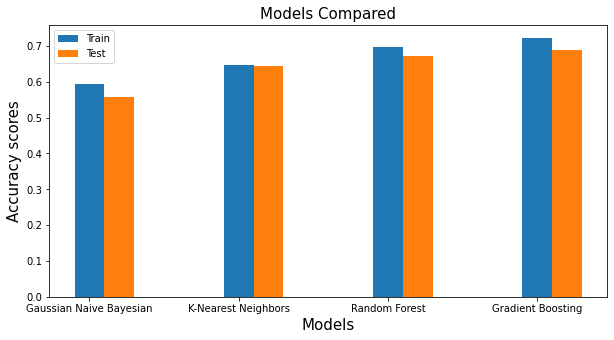

In [25]:
# Visually compare training and test models
index = [1, 2, 3, 4]
index_acc = [1.2, 2.2, 3.2, 4.2]
modelscompared_plot = plt.figure(figsize=(10, 5))
modelscompared_plot = plt.xlabel('Models', fontsize=15)
modelscompared_plot = plt.ylabel ('Accuracy scores', fontsize=15)
modelscompared_plot = plt.title('Models Compared', fontsize=15)
modelscompared_plot = plt.bar(index,cv_train_model, label='Train', width=0.2)
modelscompared_plot = plt.bar(index_acc,cv_test_model, label='Test', width=0.2)
modelscompared_plot = plt.xticks([1, 2, 3, 4], model_name)
modelscompared_plot = plt.legend()
plt.show()

## Best Model: Gradient Boosting

Gradient Boosting has the highest F1 scores but Random Forest is a close second. Gradient Boosting, also, tends to run quicker than Random Forest. Therefore, the best model appears to be Gradient Boosting.

## Feature importance in Gradient Boosting Model

In [26]:
# Rank feature importance
features = X
importances = list(gb_best.feature_importances_)
importances_sorted = np.sort(importances)
importance_table = pd.DataFrame(list(zip(X, importances_sorted)), columns =['Features', 'Importance scores'],
                               index=[1, 2, 3, 4, 5, 6, 7, 8]) 
importance_table

,Features,Importance scores
1,Percent Of Adult HD Patients With Kt/V >= 1.2,0.066513
2,Percentage Of Adult Patients With Hypercalcemi...,0.074421
3,Mortality Rate Standardized,0.075209
4,Readmission Rate Standardized,0.086247
5,Hospitalization Rate Standardized,0.093333
6,Transfusion Rate Standardized,0.169324
7,Fistula Rate Standardized,0.211730
8,Percentage Of Adult Patients With Long Term Ca...,0.223223


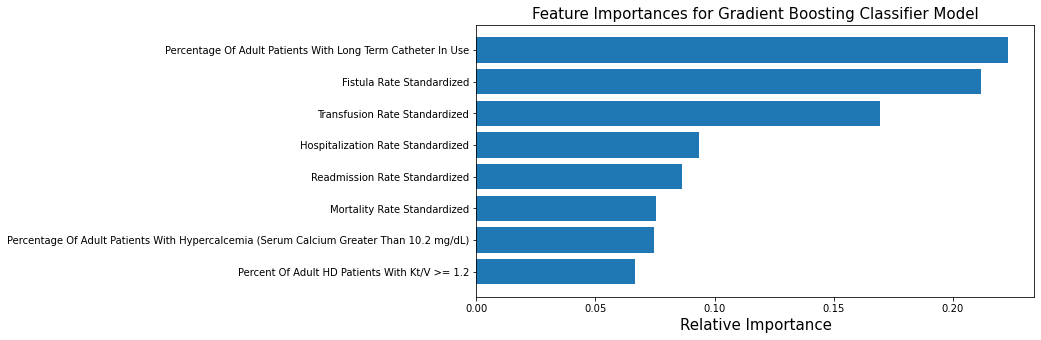

In [27]:
# Bar graph of feature importance
index = [0, 1, 2, 3, 4, 5, 6, 7]
importance_plot = plt.figure(figsize=(10, 5))
importance_plot = plt.barh(index, importances_sorted)
importance_plot = plt.xlabel('Relative Importance', fontsize=15)
importance_plot = plt.yticks(index, features)
importance_plot = plt.title('Feature Importances for Gradient Boosting Classifier Model', fontsize=15)
plt.show()